In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('/Users/vinay/ub/spring-22/CSE635-NLP/proj/task_1/task_1_information_extraction_train.tsv', sep='\t')

In [8]:
df.head()

,NOTES,EVENT_DATE,SOURCE,FATALITIES,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,ACTOR2,INTER2,INTERACTION,LOCATION
0,Three people were killed while 27 others injur...,29-August-2012,Statesman (Pakistan),3,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Pakistan),3,Civilians (Pakistan),7,37,Jacobabad
1,Government security forces opened fire at a pr...,03-May-2014,Undisclosed Source,0,Violence against civilians,Attack,Military Forces of Somalia (2012-2017),1,Civilians (Somalia),7,17,Baidoa
2,Al Shabaab forces attacked government forces b...,01-May-2012,All Africa,11,Battles,Armed clash,Al Shabaab,2,Military Forces of Somalia (2004-2012),1,12,Hudur
3,Agreement: Rebels resumed peace talks with the...,05-October-2013,AFP,0,Strategic developments,Agreement,MNLA: National Movement for the Liberation of ...,2,Government of Mali (2013-2020),1,12,Bamako
4,The person who had acted as the go-between for...,21-December-2001,Dispatch Kabylie,0,Riots,Violent demonstration,Rioters (Algeria),5,NaN,0,50,Bejaia


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   NOTES           97109 non-null   object
 1   EVENT_DATE      100000 non-null  object
 2   SOURCE          100000 non-null  object
 3   FATALITIES      100000 non-null  int64 
 4   EVENT_TYPE      100000 non-null  object
 5   SUB_EVENT_TYPE  100000 non-null  object
 6   ACTOR1          100000 non-null  object
 7   INTER1          100000 non-null  int64 
 8   ACTOR2          74737 non-null   object
 9   INTER2          100000 non-null  int64 
 10  INTERACTION     100000 non-null  int64 
 11  LOCATION        100000 non-null  object
dtypes: int64(4), object(8)
memory usage: 9.2+ MB


In [10]:
df.describe()

,FATALITIES,INTER1,INTER2,INTERACTION
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.361370,3.595680,3.236460,34.064700
std,41.650728,2.006875,2.924762,18.879256
min,0.000000,1.000000,0.000000,10.000000
25%,0.000000,2.000000,0.000000,15.000000
50%,1.000000,3.000000,2.000000,35.000000
75%,2.000000,6.000000,7.000000,55.000000
max,1350.000000,8.000000,8.000000,88.000000


In [15]:
df['INTERACTION'].unique()

array([37, 17, 12, 50, 60, 20, 13, 18, 24, 44, 27, 15, 33, 47, 16, 57, 11,
       28, 30, 34, 55, 14, 23, 38, 10, 78, 22, 35, 80, 36, 56, 68, 58, 48,
       40, 88, 66, 45, 25, 46, 70, 26])

In [38]:
intractions = df['INTERACTION'].value_counts()

In [60]:
events = df['EVENT_TYPE'].value_counts()

Text(0, 0.5, 'Count')

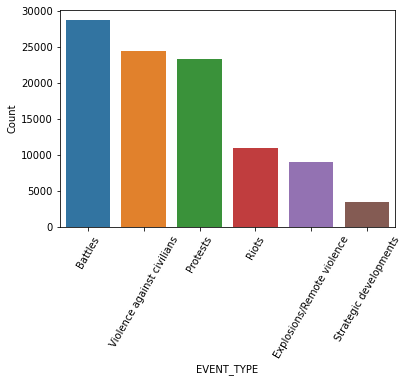

In [64]:
plt.xticks(rotation=60)
# plt.figure(figsize=(15,8))
_ = sns.barplot(x=events.index, y=events.values)
plt.xlabel('EVENT_TYPE')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

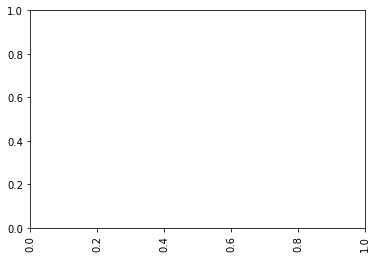

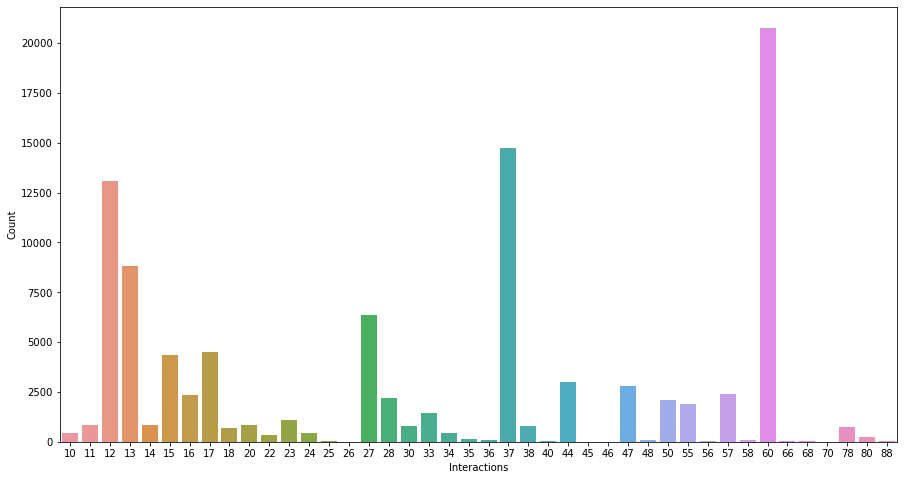

In [57]:
plt.xticks(rotation=90)
plt.figure(figsize=(15,8))
_ = sns.barplot(x=intractions.index, y=intractions.values)
plt.xlabel('Interactions')
plt.ylabel('Count')

In [16]:
df['EVENT_TYPE'].value_counts()

Battles                       28743
Violence against civilians    24403
Protests                      23336
Riots                         10985
Explosions/Remote violence     9060
Strategic developments         3473
Name: EVENT_TYPE, dtype: int64

In [17]:
df['ACTOR1'].value_counts()

Protesters (Pakistan)                           7673
Protesters (India)                              5551
Unidentified Armed Group (Pakistan)             3075
Unidentified Armed Group (Somalia)              2993
Rioters (Bangladesh)                            2296
                                                ... 
Hafiz Jee Qilla Communal Militia (Pakistan)        1
Chakkirti Communal Militia (Bangladesh)            1
Darood-Warsangeli Sub-Clan Militia (Somalia)       1
PDG: Gabonese Democratic Party                     1
Chang Communal Militia (Pakistan)                  1
Name: ACTOR1, Length: 3425, dtype: int64

In [19]:
df['INTER1'].value_counts()

6    22927
3    22425
1    20518
2    13439
5    10575
4     6616
8     3496
7        4
Name: INTER1, dtype: int64

In [20]:
df['INTER2'].value_counts()

7    31526
0    25263
1    16285
2    11278
3     7372
4     4053
5     2363
8     1410
6      450
Name: INTER2, dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
encoder = OrdinalEncoder()

In [24]:
temp = encoder.fit_transform(df)

In [32]:
tdf = pd.DataFrame(temp, columns=df.columns)

In [33]:
tdf.corr()

,NOTES,EVENT_DATE,SOURCE,FATALITIES,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,ACTOR2,INTER2,INTERACTION,LOCATION
NOTES,1.000000,-0.010581,-0.000527,-0.013330,-0.004284,0.103391,0.114237,0.090214,0.077720,-0.124008,0.082347,0.019506
EVENT_DATE,-0.010581,1.000000,0.002322,-0.001511,-0.005633,0.001955,-0.001882,-0.000579,0.007161,0.000616,-0.005958,-0.000841
SOURCE,-0.000527,0.002322,1.000000,-0.048819,0.041879,-0.073845,-0.034968,-0.045009,-0.066746,0.081331,-0.031272,0.011715
FATALITIES,-0.013330,-0.001511,-0.048819,1.000000,-0.081033,-0.143803,-0.107406,-0.118064,0.021857,0.056512,-0.135721,-0.009352
EVENT_TYPE,-0.004284,-0.005633,0.041879,-0.081033,1.000000,0.041819,0.157410,0.054555,-0.480239,0.551276,0.307144,0.006526
SUB_EVENT_TYPE,0.103391,0.001955,-0.073845,-0.143803,0.041819,1.000000,0.298196,0.545748,0.139776,-0.410592,0.446337,0.007077
ACTOR1,0.114237,-0.001882,-0.034968,-0.107406,0.157410,0.298196,1.000000,0.237514,0.052950,-0.068979,0.272998,0.039926
INTER1,0.090214,-0.000579,-0.045009,-0.118064,0.054555,0.545748,0.237514,1.000000,0.041766,-0.401672,0.739077,0.008716
ACTOR2,0.077720,0.007161,-0.066746,0.021857,-0.480239,0.139776,0.052950,0.041766,1.000000,-0.591929,-0.376444,0.015869
INTER2,-0.124008,0.000616,0.081331,0.056512,0.551276,-0.410592,-0.068979,-0.401672,-0.591929,1.000000,-0.042641,-0.001350


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

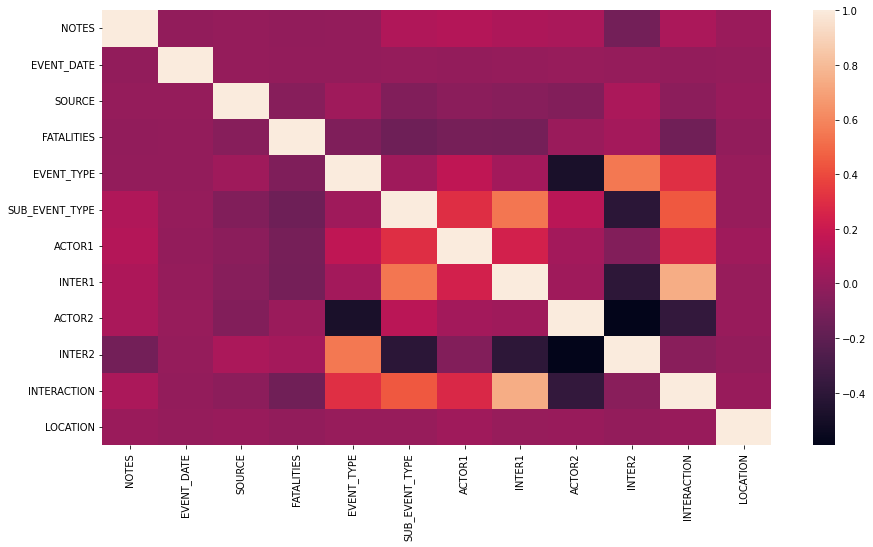

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(data=tdf.corr())